# Assignment 4: Optimizing Logistic Regression

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In this assignment, you will continue practicing the fourth step of the machine learning life cycle and train logistic regression models that will be used to solve a classification problem.  You will build many variants, each one with a different value of the $C$ hyperparameter, which governs the amount of regularization used. Regularization is a process where we add a "penalty" to the original log loss function. This penalty is a function of the magnitudes of the weights learned in the Logistic Regression. The following shows the regularized log loss using what is called "L2" regularization.<br><br> 

<center>$Regularized \ LogLoss = -\frac{1}{N} \sum\limits_{i=1}^N (y_ilog(P_i)+(1-y_i)log(1-P_i))+\frac{1}{C} \sum\limits_{j=1}^m w_j^2$</center><br><br>


With L2 regularization, the penalty is the sum of the squares of the weights scaled by a constant $1/C$. When the hyperparameter $C$ is large, we reduce the weight of the penalty, which results in less regularization. You will build Logistic regressions with different values of $C$ and will check how this impacts the log loss.


You will complete the following tasks:

1. Build your DataFrame and define your ML problem:
    * Load the "cell2cell" data set into a DataFrame
    * Define the label - what are you predicting?
    * Identify features
3. Create labeled examples from the data set
4. Split the data into training and test data sets
5. Train logistic regression classifiers and evaluate their performances:
    * Fit logistic regression models to the training data using different hyperparameter values per classifier
    * Evaluate the accuracy of each model's predictions
    * Plot and analyize the resulting log loss and accuracy scores

## Part 1. Build Your DataFrame and Define Your ML Problem

#### Load a Data Set and Save it as a Pandas DataFrame

We will work with the "cell2celltrain" data set. This version of the data set has been preprocessed and is ready for modeling.

In [24]:
# Do not remove or edit the line below:
filename = os.path.join(os.getcwd(), "data", "cell2celltrain.csv")

**Task**: Load the data and save it to DataFrame `df`.

In [25]:
# YOUR CODE HERE
df = pd.read_csv(filename)
df.head(5)

,CustomerID,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,3000002,True,SEAPOR503,False,False,True,False,False,True,True,...,0.487071,-0.077013,1.387766,-0.883541,4.662897,-0.1283,-0.169283,-0.103411,-0.140707,-0.864858
1,3000010,True,PITHOM412,True,False,False,False,False,True,True,...,-0.616775,3.019920,0.392039,0.871495,-0.180167,-0.1283,-0.169283,0.215243,-0.140707,-0.864858
2,3000014,False,MILMIL414,True,False,False,False,False,False,False,...,-0.616775,3.019920,-0.241605,0.202910,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-0.368174
3,3000022,False,PITHOM412,False,False,True,False,False,True,True,...,2.694763,0.305179,-0.060564,-0.883541,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-1.195980
4,3000026,True,OKCTUL918,False,False,False,False,False,True,True,...,1.590917,1.857585,0.663601,1.372934,-0.180167,-0.1283,-0.169283,1.489856,2.469282,-1.195980


#### Define the Label

This is a binary classification problem in which we will predict customer churn. The label is the `Churn` column.

#### Identify Features

To implement a Logistic Regression model, we must use only the numeric columns. 


<b>Task</b>: Use the Pandas DataFrame <code>select_dtypes()</code> method to obtain all of names of columns that have a dtype of "float64." Save the result to a list named `feature_list`. 

In [26]:
# YOUR CODE HERE
feature_list = list(df.select_dtypes(include='float64').columns)
feature_list

['MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'AdjustmentsToCreditRating',
 'HandsetPrice']

## Part 2. Create Labeled Examples from the Data Set 

Our data is fully prepared for modeling. We can now create labeled examples from DataFrame `df`.

<b>Task</b>: Obtain the feature columns from DataFrame `df` and assign to `X`. Obtain the label column from DataFrame `df` and assign to `y`.

You should have 51047 labeled examples. Each example contains 35 features and one label.

In [27]:
# YOUR CODE HERE
X = df[feature_list]
display(X)
y = df['Churn']
display(y)

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,-0.782676,-0.578738,-1.041153,-0.289532,-0.414422,-0.125914,-0.564836,-0.449987,-0.587303,-0.309284,...,0.487071,-0.077013,1.387766,-0.883541,4.662897,-0.128300,-0.169283,-0.103411,-0.140707,-0.864858
1,-0.940180,-0.973177,-1.250809,-0.401714,-0.414422,-0.125914,0.029311,0.030120,-0.631532,-0.373230,...,-0.616775,3.019920,0.392039,0.871495,-0.180167,-0.128300,-0.169283,0.215243,-0.140707,-0.864858
2,-0.468118,-0.976952,-0.370255,-0.401714,-0.414422,-0.125914,0.037077,0.030120,-0.664703,-0.373230,...,-0.616775,3.019920,-0.241605,0.202910,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-0.368174
3,0.526784,1.484048,1.181196,0.154708,-0.414422,-0.125914,0.654524,0.234797,4.012499,0.330172,...,2.694763,0.305179,-0.060564,-0.883541,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-1.195980
4,-0.936810,-0.992050,-1.250809,-0.401714,-0.414422,-0.125914,0.044844,0.025066,-0.664703,-0.373230,...,1.590917,1.857585,0.663601,1.372934,-0.180167,-0.128300,-0.169283,1.489856,2.469282,-1.195980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,-0.233099,-0.301309,-0.076738,-0.289532,-0.383361,-0.125914,0.025428,0.022539,0.363618,-0.126582,...,0.487071,0.573107,1.659328,1.790800,-0.180167,-0.128300,-0.169283,0.533896,-0.140707,-0.368174
51043,0.816402,2.301236,1.600507,0.042526,0.051479,0.352789,0.518608,0.431894,1.181852,-0.309284,...,0.487071,0.328819,0.754122,1.122214,-0.180167,-0.128300,-0.169283,1.489856,2.469282,-0.368174
51044,-0.233099,-0.301309,-0.076738,-0.289532,-0.383361,-0.125914,0.025428,0.022539,4.012499,0.019579,...,0.487071,-0.010031,0.210998,-0.883541,-0.180167,-0.128300,-0.169283,0.852549,2.469282,-0.037051
51045,-0.233099,-0.301309,-0.076738,-0.289532,-0.383361,-0.125914,0.025428,0.022539,-0.664703,-0.373230,...,0.487071,0.206676,0.029957,-0.883541,-0.180167,-0.128300,-0.169283,1.489856,-0.140707,-0.864858


0         True
1         True
2        False
3        False
4         True
         ...  
51042     True
51043    False
51044     True
51045    False
51046    False
Name: Churn, Length: 51047, dtype: bool

## Part 3. Create Training and Test Data Sets

<b>Task</b>: Create training and test data sets out of the labeled examples. Save the results to variables `X_train, X_test, y_train, y_test`.

In [28]:
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

<b>Task</b>: Check the dimensions of the training and test data sets.

In [29]:
# YOUR CODE HERE
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34201, 35) (16846, 35) (34201,) (16846,)


## Part 4. Train a Logistic Regression Classifier and Evaluate the Model

The code cell below contains a function definition `train_test_LR()`. 

Inspect the function definition `train_test_LR(X_train, X_test, y_train, y_test, c=1)`. The function expects the training and test data sets, as well as a value for hyperparameter $C$. Note that we supplied the value of 1 for $C$ by default.

<b>Task:</b> Complete the function to make it work.

This function should:
1. train a Logistic Regression model on the training data
2. test the resulting model on the test data
3. compute and return two items:
    * the log loss of the resulting probability predictions on the test data 
    * the accuracy score of the resulting predicted class labels on the test data


You will use the scikit-learn [```LogisticRegression``` class](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) and will provide the arguments `C=c` when creating the model object.




In [30]:
def train_test_LR(X_train, y_train, X_test, y_test, c=1):
    '''
    Fit a Linear Regression classifier to the training data X_train, y_train.
    Return the loss and accuracy of resulting predictions on the test set.
    Parameters:
        C = Factor that controls how much regularization is applied to the model.
    '''
    
    # 1. Create the LogisticRegression model object below and assign to variable 'model'

    # YOUR CODE HERE
    model = LogisticRegression(C=c)

    # 2. Fit the model to the training data below

    # YOUR CODE HERE
    model.fit(X_train, y_train)

    # 3. Make predictions on the test data using the predict_proba() method and assign the 
    # result to the variable 'probability_predictions' below

    # YOUR CODE HERE
    probability_predictions = model.predict_proba(X_test)

    # print the first 5 probability class predictions
    df_print = pd.DataFrame(probability_predictions, columns = ['Class: False', 'Class: True'])
#     print('Class Prediction Probabilities: \n' + df_print[0:5].to_string(index=False))

    # 4. Compute the log loss on 'probability_predictions' and save the result to the variable
    # 'l_loss' below

    # YOUR CODE HERE
    l_loss = log_loss(y_test, probability_predictions)
#     print('Log loss: ' + str(l_loss))


    # 5. Make predictions on the test data using the predict() method and assign the result 
    # to the variable 'class_label_predictions' below

    # YOUR CODE HERE
    class_label_predictions = model.predict(X_test)

    # print the first 5 class label predictions 
#     print('Class labels: ' + str(class_label_predictions[0:5]))

    # 6.Compute the accuracy score on 'class_label_predictions' and save the result 
    # to the variable 'acc_score' below

    acc_score = accuracy_score(y_test, class_label_predictions)
#     print('Accuracy: ' + str(acc_score))
    
    return l_loss, acc_score

    

### Train a Model and Analyze the Results

<b>Task:</b> Use your function `train_test_LR()` to train one Logistic Regression classifier with the default value of hyperparameter C (`c=1`). Print the resulting log loss and accuracy score.

In [31]:
# YOUR CODE HERE
loss, acc = train_test_LR(X_train, y_train, X_test, y_test, c=1)
print('loss: ' + str(loss) + ', accuracy: ' + str(acc))

loss: 0.5878612157234173, accuracy: 0.7097827377418972


## Part 5. Train on Different Hyperparameter Values and Analyze the Results

Now we will adjust the $C$ regularization hyperparameter to check its impact on the model's log loss and accuracy. Hyperparameter `C` stands for the inverse of regularization strength. Smaller values specify stronger regularization and a simpler model. Larger values specify weaker regularization and a more complex model.<br>

The code cell below creates a list `cs` of twenty values of $C$.  Every item in the list has a value $10^i$ for every integer $i$ in the output of `range(-10,10)`. Run the code cell below and inspect the different values of $C$.

In [32]:
cs = [10**i for i in range(-10,10)]
cs

[1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1,
 10,
 100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000]

<b>Task</b>: In the code cell below, loop over list `cs` and train and evaluate a different Logistic Regression model for every value of $C$. Use your function `train_test_LR()`. Print the resulting log loss and accuracy scores per model.

We will want to create visualizations that plot the resulting log loss and accuracy score for every value of hyperparameter $C$. Considering this, save the resulting log loss values and accuracy scores that your function returns to two different lists. You will use these lists to create plots later.

In [33]:
# YOUR CODE HERE
losses = []
accuracies = []
for i in cs:
    loss, acc = train_test_LR(X_train, y_train, X_test, y_test, c=i)
    print('c: ' + str(i) + ', loss: ' + str(loss) + ', accuracy: ' + str(acc))
    losses.append(loss)
    accuracies.append(acc)

c: 1e-10, loss: 0.6019882218839937, accuracy: 0.710198266650837
c: 1e-09, loss: 0.6019879879688643, accuracy: 0.710198266650837
c: 1e-08, loss: 0.6019856457586286, accuracy: 0.710198266650837
c: 1e-07, loss: 0.6019623116656803, accuracy: 0.710198266650837
c: 1e-06, loss: 0.6017368944992653, accuracy: 0.710198266650837
c: 1e-05, loss: 0.6000102566181061, accuracy: 0.710198266650837
c: 0.0001, loss: 0.5939550491932645, accuracy: 0.710198266650837
c: 0.001, loss: 0.5882530046237049, accuracy: 0.7104950730143654
c: 0.01, loss: 0.5876588226394373, accuracy: 0.7099014602873086
c: 0.1, loss: 0.587835892808505, accuracy: 0.7099014602873086
c: 1, loss: 0.5878612157234173, accuracy: 0.7097827377418972
c: 10, loss: 0.5878648343540094, accuracy: 0.7098420990146028
c: 100, loss: 0.5878651012583729, accuracy: 0.7098420990146028
c: 1000, loss: 0.5878651279496574, accuracy: 0.7098420990146028
c: 10000, loss: 0.5878651306188116, accuracy: 0.7098420990146028
c: 100000, loss: 0.587865130885716, accuracy:

Now let's visualize the results. 

Before we create plots, let's reformat the hyperparameter values in list `cs` so that they can be easily visualized in our plots. We will take the log 10 of the hyperparameter values and save it to a new list called `cs_log10`. Let's take a look at the original values and transformed values:
 

In [34]:
cs_log10 = np.log10(cs)

print(cs)
print(cs_log10)

[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]
[-10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.  -2.  -1.   0.   1.   2.   3.
   4.   5.   6.   7.   8.   9.]



#### Plot Log Loss

<b>Task:</b> Create a `seaborn` lineplot to plot the resulting log loss for every value of hyperparameter $C$. The hyperparameter $C$ should be plotted on the x axis and the log loss should be plotted on the y axis. Label the x and y axes accordingly. Use the transformed values of hyperparameter $C$ contained in the list `cs_log10`.

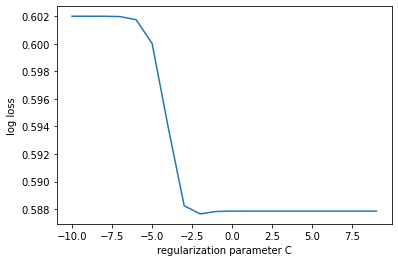

In [38]:
# YOUR CODE HERE
ax = sns.lineplot(x=cs_log10, y=losses);
ax.set_xlabel('regularization parameter C');
ax.set_ylabel('log loss');

<b>Analysis</b>: Which value of $C$ yields the best results, in terms of loss?

The best value of C according to the plot is 10^-2.6 (since the plot shows log(c))

#### Plot Accuracy

<b>Task:</b> Create a `seaborn` lineplot to plot the resulting accuracy score for every value of hyperparameter $C$. The hyperparameter $C$ should be plotted on the x axis and the accuracy score should be plotted on the y axis. Label the x and y axes accordingly. Use the transformed values of hyperparameter $C$ contained in the list `cs_log10`.

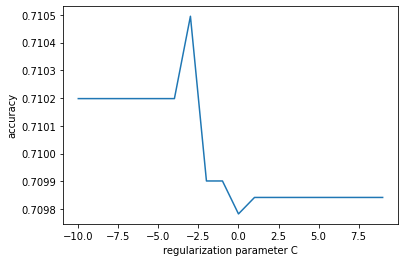

In [39]:
# YOUR CODE HERE
ax = sns.lineplot(x=cs_log10, y=accuracies);
ax.set_xlabel('regularization parameter C');
ax.set_ylabel('accuracy');

<b>Analysis</b>: Which value of $C$ yields the best results, in terms of accuracy?

Similar to the previous plot, this plot suggests 10^-2.6 seems to be the best choice for C.